## simple introudction : 
   
* this data consist from 2 parts :
       
     * in  part 1 :
   
     * i will make som Data Explantory , Data Analysis , data visualization  , data preparing additional to datacleaning  
   
* part 2:   :

    * i will build sequetial Neural Network by using Tensorflow .:     

* Target : to predict  scoreSentiment and see if positve or negative .
* positve -->>1
* Negative -->>0
 
 

## About Dataset: 

  * this dataset is published on the kaggel .
  
   

##                                                       --->>  . if you found my Notebook useful dont forget to upvote me  <<---    

In [1]:
#import the necessary libararies:

# imports :

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix ,ConfusionMatrixDisplay



In [2]:
# load the data:

data=pd.read_csv("critic_reviews.csv")
data.head(25)

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId
0,1912176,1966-07-30,Jennie Kermode,/critics/jennie-kermode,fresh,True,False,False,False,/critics/source/1869,Eye for Film,http://www.eyeforfilm.co.uk/reviews.php?id=7898,NaN,POSITIVE,4/5,7602d2ab-c9bc-3439-9cd6-d3a06e81728e
1,1895073,1998-08-21,Scott Nash,/critics/scott-nash,fresh,True,False,False,False,/critics/source/1465,Three Movie Buffs,http://www.threemoviebuffs.com/review/blade,It's stylish and fast-paced. It's also a lot o...,POSITIVE,3/4,4128b2f6-8c69-396a-a83d-0d44eb90e5f7
2,25507,2000-01-01,Roger Ebert,/critics/roger-ebert,fresh,True,False,False,True,/critics/source/67,Chicago Sun-Times,http://www.rogerebert.com/reviews/the-rocketee...,"You have to dial down, to return to an age of ...",POSITIVE,3/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
3,25508,2000-01-01,NaN,NaN,rotten,False,True,False,True,/critics/source/148,Empire Magazine,http://www.empireonline.com/reviews/reviewcomp...,Reaches for the skies but runs out of fuel.,NEGATIVE,2/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
4,25509,2000-01-01,Joe Brown,/critics/joe-brown,fresh,True,False,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"Based on a comic book, deliciously corny but n...",POSITIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
5,25510,2000-01-01,Hal Hinson,/critics/hal-hinson,rotten,False,True,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"It's a humble little item, actually, easily di...",NEGATIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
6,25516,2000-01-01,Steve Rhodes,/critics/steve-rhodes,rotten,False,True,False,False,/critics/source/703,Internet Reviews,http://reviews.imdb.com/Reviews/77/7795,The problem with the film is that it is nothin...,NEGATIVE,2/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
7,25518,2000-01-01,James O'Ehley,/critics/james-oehley,rotten,False,True,False,False,/critics/source/1819,Sci-Fi Movie Page,http://www.scifimoviepage.com/rocket.html,"Okay special effects, but the story tends to d...",NEGATIVE,2.5/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
8,25519,2000-01-01,Marc Savlov,/critics/marc-savlov,fresh,True,False,False,True,/critics/source/28,Austin Chronicle,http://www.austinchronicle.com/gyrobase/Calend...,"Such an idealized time never really existed, t...",POSITIVE,3.5/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
9,25525,2000-01-01,Chris Hicks,/critics/chris-hicks,rotten,False,True,False,False,/critics/source/121,Deseret News (Salt Lake City),http://www.deseretnews.com/article/700001558/T...,".. has its exciting and amusing moments, but o...",NEGATIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a


## Analysis :

In [3]:
# to  know some info about dataset 1 :

print(data.info())

print("-"*50)

print("shape of dtataset : {}".format(np.shape(data)))

print ("-"*50)

print(f"Types of dataset : \n  {data.dtypes}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27142 entries, 0 to 27141
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviewId         27142 non-null  int64 
 1   creationDate     27142 non-null  object
 2   criticName       27054 non-null  object
 3   criticPageUrl    27054 non-null  object
 4   reviewState      27142 non-null  object
 5   isFresh          27142 non-null  bool  
 6   isRotten         27142 non-null  bool  
 7   isRtUrl          26513 non-null  object
 8   isTopCritic      27142 non-null  bool  
 9   publicationUrl   27142 non-null  object
 10  publicationName  27142 non-null  object
 11  reviewUrl        25077 non-null  object
 12  quote            26953 non-null  object
 13  scoreSentiment   27142 non-null  object
 14  originalScore    19413 non-null  object
 15  movieId          27142 non-null  object
dtypes: bool(3), int64(1), object(12)
memory usage: 2.8+ MB
None
----------------

In [4]:
# to know some statistical info about Numerical data : :

print(data.describe().T)


            count          mean           std     min         25%        50%  \
reviewId  27142.0  1.628587e+07  3.493963e+07  1705.0  2082886.25  2407967.5   

                 75%          max  
reviewId  2667693.25  102923418.0  


In [5]:
# to know some statistical info about Categorical data :

print(data.describe(include="O"))

       creationDate    criticName          criticPageUrl reviewState isRtUrl  \
count         27142         27054                  27054       27142   26513   
unique         4016          3111                   3116           2       2   
top      2000-01-01  Matt Brunson  /critics/matt-brunson       fresh   False   
freq            405            86                     86       22060   26509   

             publicationUrl  publicationName                     reviewUrl  \
count                 27142            27142                         25077   
unique                 1755             1755                         24726   
top     /critics/source/141  eFilmCritic.com  http://www.jackiekcooper.com   
freq                    144              144                            17   

                                                  quote scoreSentiment  \
count                                             26953          27142   
unique                                            26946     

In [6]:
# to get evey count of item  in feature :

for col in data.columns:
    c=data[col].value_counts()
    print(c)
    print("-"*50)
    print(f"Number of counts -->> \n {len(c)}")
    print("-"*50)

reviewId
1912176      1
2574196      1
2574086      1
2573729      1
2573905      1
            ..
2199052      1
2199143      1
2199134      1
2199111      1
102923418    1
Name: count, Length: 27142, dtype: int64
--------------------------------------------------
Number of counts -->> 
 27142
--------------------------------------------------
creationDate
2000-01-01    405
2022-02-28    164
2018-04-25    139
2022-07-05    133
2015-07-14    133
             ... 
2010-03-16      1
2019-08-31      1
2010-03-17      1
2010-03-18      1
1966-07-30      1
Name: count, Length: 4016, dtype: int64
--------------------------------------------------
Number of counts -->> 
 4016
--------------------------------------------------
criticName
Matt Brunson          86
Felix Vasquez Jr.     85
James Berardinelli    85
Brian Orndorf         84
Robert Roten          82
                      ..
Becky Ohlsen           1
Joni Blyth             1
Steve Spears           1
Brian Miller           1
Benjo Cola

 ## Data cleaning :

In [7]:
# check the null values :
# ther null values in userDisplayName , reviewId
data.isna().mean()

reviewId           0.000000
creationDate       0.000000
criticName         0.003242
criticPageUrl      0.003242
reviewState        0.000000
isFresh            0.000000
isRotten           0.000000
isRtUrl            0.023174
isTopCritic        0.000000
publicationUrl     0.000000
publicationName    0.000000
reviewUrl          0.076081
quote              0.006963
scoreSentiment     0.000000
originalScore      0.284762
movieId            0.000000
dtype: float64

In [8]:
# in Datascience : ther are Role say if percentage of null values in any feature in dataset increase about 25% Drop it:
# reviewId and movieId feature  is not important as dataset will not affecting with dropping it   : 
# All URL not affected on dataset if removed it :
#clean dataset :

clean=data.drop(columns=["originalScore","reviewId","criticPageUrl","publicationUrl","reviewUrl","movieId"],axis=1,inplace=True)
data

,creationDate,criticName,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationName,quote,scoreSentiment
0,1966-07-30,Jennie Kermode,fresh,True,False,False,False,Eye for Film,NaN,POSITIVE
1,1998-08-21,Scott Nash,fresh,True,False,False,False,Three Movie Buffs,It's stylish and fast-paced. It's also a lot o...,POSITIVE
2,2000-01-01,Roger Ebert,fresh,True,False,False,True,Chicago Sun-Times,"You have to dial down, to return to an age of ...",POSITIVE
3,2000-01-01,NaN,rotten,False,True,False,True,Empire Magazine,Reaches for the skies but runs out of fuel.,NEGATIVE
4,2000-01-01,Joe Brown,fresh,True,False,False,True,Washington Post,"Based on a comic book, deliciously corny but n...",POSITIVE
...,...,...,...,...,...,...,...,...,...,...
27137,2024-06-14,Mat Brunet,fresh,True,False,False,False,AniMat's Review (YouTube),I know this is meant to show the first time th...,POSITIVE
27138,2024-06-15,Josh Larsen,fresh,True,False,False,False,LarsenOnFilm,&#46;&#46;&#46; dark&#44; rainy&#44; and askew...,POSITIVE
27139,2024-06-17,Casey Chong,fresh,True,False,False,False,Casey's Movie Mania,Jack Nicholson&#44; who received top billing a...,POSITIVE
27140,2024-06-24,Udita Jhunjhunwala,fresh,True,False,False,True,Livemint,Unlike the more recent superhero movies that a...,POSITIVE


In [9]:
# check again the null values:

data.isna().sum()

creationDate         0
criticName          88
reviewState          0
isFresh              0
isRotten             0
isRtUrl            629
isTopCritic          0
publicationName      0
quote              189
scoreSentiment       0
dtype: int64

In [10]:
# fill the null values if found any : 

# Load your dataset into a pandas dataframe
df = data

# Fill null values in numeric columns with the median of the column :

numeric_cols = df.select_dtypes("number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill null values in object columns with the mode of the column :
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].fillna(df[object_cols].mode())


In [11]:
# Drop rows with more than 620 null values
df_cleaned = df.dropna(thresh=2)

# Display the cleaned DataFrame
df_cleaned

,creationDate,criticName,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationName,quote,scoreSentiment
0,1966-07-30,Jennie Kermode,fresh,True,False,False,False,Eye for Film,A mild improvement over its lackluster predece...,POSITIVE
1,1998-08-21,Scott Nash,fresh,True,False,False,False,Three Movie Buffs,It's stylish and fast-paced. It's also a lot o...,POSITIVE
2,2000-01-01,Roger Ebert,fresh,True,False,False,True,Chicago Sun-Times,"You have to dial down, to return to an age of ...",POSITIVE
3,2000-01-01,NaN,rotten,False,True,False,True,Empire Magazine,Reaches for the skies but runs out of fuel.,NEGATIVE
4,2000-01-01,Joe Brown,fresh,True,False,False,True,Washington Post,"Based on a comic book, deliciously corny but n...",POSITIVE
...,...,...,...,...,...,...,...,...,...,...
27137,2024-06-14,Mat Brunet,fresh,True,False,False,False,AniMat's Review (YouTube),I know this is meant to show the first time th...,POSITIVE
27138,2024-06-15,Josh Larsen,fresh,True,False,False,False,LarsenOnFilm,&#46;&#46;&#46; dark&#44; rainy&#44; and askew...,POSITIVE
27139,2024-06-17,Casey Chong,fresh,True,False,False,False,Casey's Movie Mania,Jack Nicholson&#44; who received top billing a...,POSITIVE
27140,2024-06-24,Udita Jhunjhunwala,fresh,True,False,False,True,Livemint,Unlike the more recent superhero movies that a...,POSITIVE


In [12]:
# check the duplicate values & Remove it if found any :

#found there duplicated values:


df=data
duplicated=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated)

#duplicated_features:

duplicated_features=df.duplicated()

# Drop the duplicated values:

data.drop_duplicates()

Number of duplicates ----->>>  6


,creationDate,criticName,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationName,quote,scoreSentiment
0,1966-07-30,Jennie Kermode,fresh,True,False,False,False,Eye for Film,A mild improvement over its lackluster predece...,POSITIVE
1,1998-08-21,Scott Nash,fresh,True,False,False,False,Three Movie Buffs,It's stylish and fast-paced. It's also a lot o...,POSITIVE
2,2000-01-01,Roger Ebert,fresh,True,False,False,True,Chicago Sun-Times,"You have to dial down, to return to an age of ...",POSITIVE
3,2000-01-01,NaN,rotten,False,True,False,True,Empire Magazine,Reaches for the skies but runs out of fuel.,NEGATIVE
4,2000-01-01,Joe Brown,fresh,True,False,False,True,Washington Post,"Based on a comic book, deliciously corny but n...",POSITIVE
...,...,...,...,...,...,...,...,...,...,...
27137,2024-06-14,Mat Brunet,fresh,True,False,False,False,AniMat's Review (YouTube),I know this is meant to show the first time th...,POSITIVE
27138,2024-06-15,Josh Larsen,fresh,True,False,False,False,LarsenOnFilm,&#46;&#46;&#46; dark&#44; rainy&#44; and askew...,POSITIVE
27139,2024-06-17,Casey Chong,fresh,True,False,False,False,Casey's Movie Mania,Jack Nicholson&#44; who received top billing a...,POSITIVE
27140,2024-06-24,Udita Jhunjhunwala,fresh,True,False,False,True,Livemint,Unlike the more recent superhero movies that a...,POSITIVE


In [13]:
# Extract all Types of columns ffom the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns
    num_cols=data.select_dtypes("number").columns
    disc_cols=data.select_dtypes(include=("int64")).columns
    conts_cols=data.select_dtypes(include=("float64")).columns
    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['creationDate', 'criticName', 'reviewState', 'isRtUrl',
       'publicationName', 'quote', 'scoreSentiment'],
      dtype='object')
 Numerical_columns ----->>> Index([], dtype='object') 
 Discrete_columns ---->>> Index([], dtype='object') 
 Continous_cols ----->> Index([], dtype='object') 
 Nominal Columns --->> reviewState       2
isFresh           2
isRotten          2
isRtUrl           2
isTopCritic       2
scoreSentiment    2
dtype: int64


## some visualization to cover dataset :

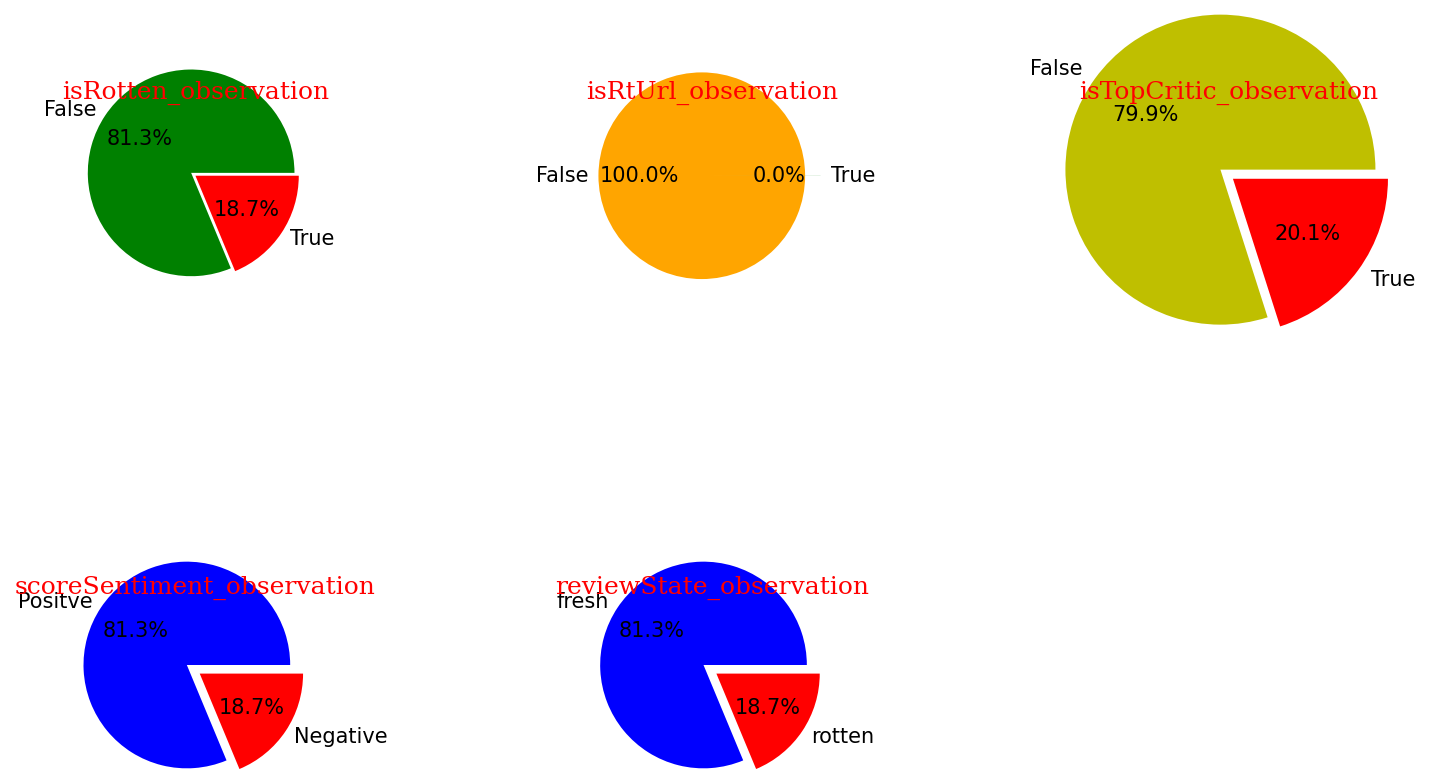

In [14]:
# make observation for this features : isRotten , isRtUrl ,isTopCritic ,scoreSentiment ,reviewState

# Font style for titles
f1 = {"family": "serif", "size": 12, "color": "r"}

# Create a figure with a specified size and DPI
plt.figure(figsize=(10, 10), dpi=150)

# Plot 1

isRotten = data["isRotten"].value_counts()
plt.subplot(3, 3, 1)  # Create the first subplot
plt.pie(
    x=isRotten,
    labels=["False", "True"],
    colors=["g", "r"],
    explode=[0.1, 0],
    autopct='%1.1f%%',
    radius=2,
)
plt.title("isRotten_observation", fontdict=f1)



# Plot 2
isRtUrl = data["isRtUrl"].value_counts()
plt.subplot(3, 3, 2)  # Create the second subplot
plt.pie(
    x=isRtUrl,
    labels=["False", "True"],
    colors=["orange", "g"],
    explode=[0.2, 0.1],
    autopct='%1.1f%%',
    radius=2,
)
plt.title("isRtUrl_observation", fontdict=f1)


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=2)


# Plot 3

isTopCritic = data["isTopCritic"].value_counts()
plt.subplot(3, 3, 3)  # Create the second subplot
plt.pie(
    x=isTopCritic,
    labels=["False", "True"],
    colors=["y", "r"],
    explode=[0.2, 0.1],
    autopct='%1.1f%%',
    radius=3,
)
plt.title("isTopCritic_observation", fontdict=f1)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=3,hspace=1)



# plot 4:


scoreSentiment = data["scoreSentiment"].value_counts()
plt.subplot(3, 3, 4)  # Create the second subplot
plt.pie(
    x=scoreSentiment,
    labels=["Positve", "Negative"],
    colors=["b", "r"],
    explode=[0.2, 0.1],
    autopct='%1.1f%%',
    radius=2,
)
plt.title("scoreSentiment_observation", fontdict=f1)


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=3,hspace=1)

# plot 5:

reviewState = data["reviewState"].value_counts()
plt.subplot(3, 3, 5)  # Create the second subplot
plt.pie(
    x=reviewState,
    labels=["fresh", "rotten"],
    colors=["b", "r"],
    explode=[0.2, 0.1],
    autopct='%1.1f%%',
    radius=2,
)
plt.title("reviewState_observation", fontdict=f1)


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=3,hspace=2)

# Show the plot
plt.show()


## preparing the dataset & Detecting the outliers :

In [15]:
# Convert All Categorical data into Numerical data:

label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data.head(20)    

,creationDate,criticName,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationName,quote,scoreSentiment
0,0,1349,0,1,0,0,0,502,1997,1
1,1,2710,0,1,0,0,0,1577,13149,1
2,2,2578,0,1,0,0,1,224,26141,1
3,2,3111,1,0,1,0,1,475,16370,0
4,2,1411,0,1,0,0,1,1669,4670,1
5,2,1098,1,0,1,0,1,1669,12306,0
6,2,2852,1,0,1,0,0,738,20929,0
7,2,1235,1,0,1,0,0,1259,15481,0
8,2,1938,0,1,0,0,1,97,17782,1
9,2,551,1,0,1,0,0,425,680,0


In [16]:
# Handle the outliers on the ALL features:
#calc Q1,Q2,Q3,IQR and detect the outliers:
#calc the lower & upper limits :
#then there outlier in most of features : 

features=["creationDate","criticName","criticName","reviewState","isFresh","isRotten","isRtUrl","isTopCritic","publicationName","quote","scoreSentiment"]

for col in features:
    Q1_col,Q3_col=data[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr 
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data[col]: 
         if ((x> upper_limit) or (x<low_limit)): 
             outlier.append(x)           
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")
       
    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*80)

 * -- >> there No outlier in creationDate feature
Q1 of creationDate --->>> 1363.0 
 Q3 of creationDate ---->>> 2981.0 
 iqr--->>1618.0
 low_limit--->>>-1064.0 
  upper_limit--->>> 5408.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
--------------------------------------------------------------------------------
 * -- >> there No outlier in criticName feature
Q1 of criticName --->>> 846.0 
 Q3 of criticName ---->>> 2402.0 
 iqr--->>1556.0
 low_limit--->>>-1488.0 
  upper_limit--->>> 4736.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
--------------------------------------------------------------------------------
 * -- >> there No outlier in criticName feature
Q1 of criticName --->>> 846.0 
 Q3 of criticName ---->>> 2402.0 
 iqr--->>1556.0
 low_limit--->>>-1488.0 
  upper_limit--->>> 4736.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
--------------------------------------------------------------------------------
Ther outlier in this feature reviewState
Q1 of reviewStat

In [17]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data[features]) 
x_scaled

array([[-2.03903216, -0.30316459, -0.30316459, ..., -0.74145638,
        -1.47713637,  0.47997053],
       [-2.03809811,  1.2329663 ,  1.2329663 , ...,  1.38847175,
        -0.05322344,  0.47997053],
       [-2.03716406,  1.0839808 ,  1.0839808 , ..., -1.2922657 ,
         1.60562491,  0.47997053],
       ...,
       [ 1.71026083, -1.27269908, -1.27269908, ..., -1.32792961,
        -0.02028141,  0.47997053],
       [ 1.71119488,  1.57608445,  1.57608445, ..., -0.06384204,
         1.3244685 ,  0.47997053],
       [ 1.71119488,  1.57608445,  1.57608445, ..., -0.06384204,
        -0.68563384, -2.08346123]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


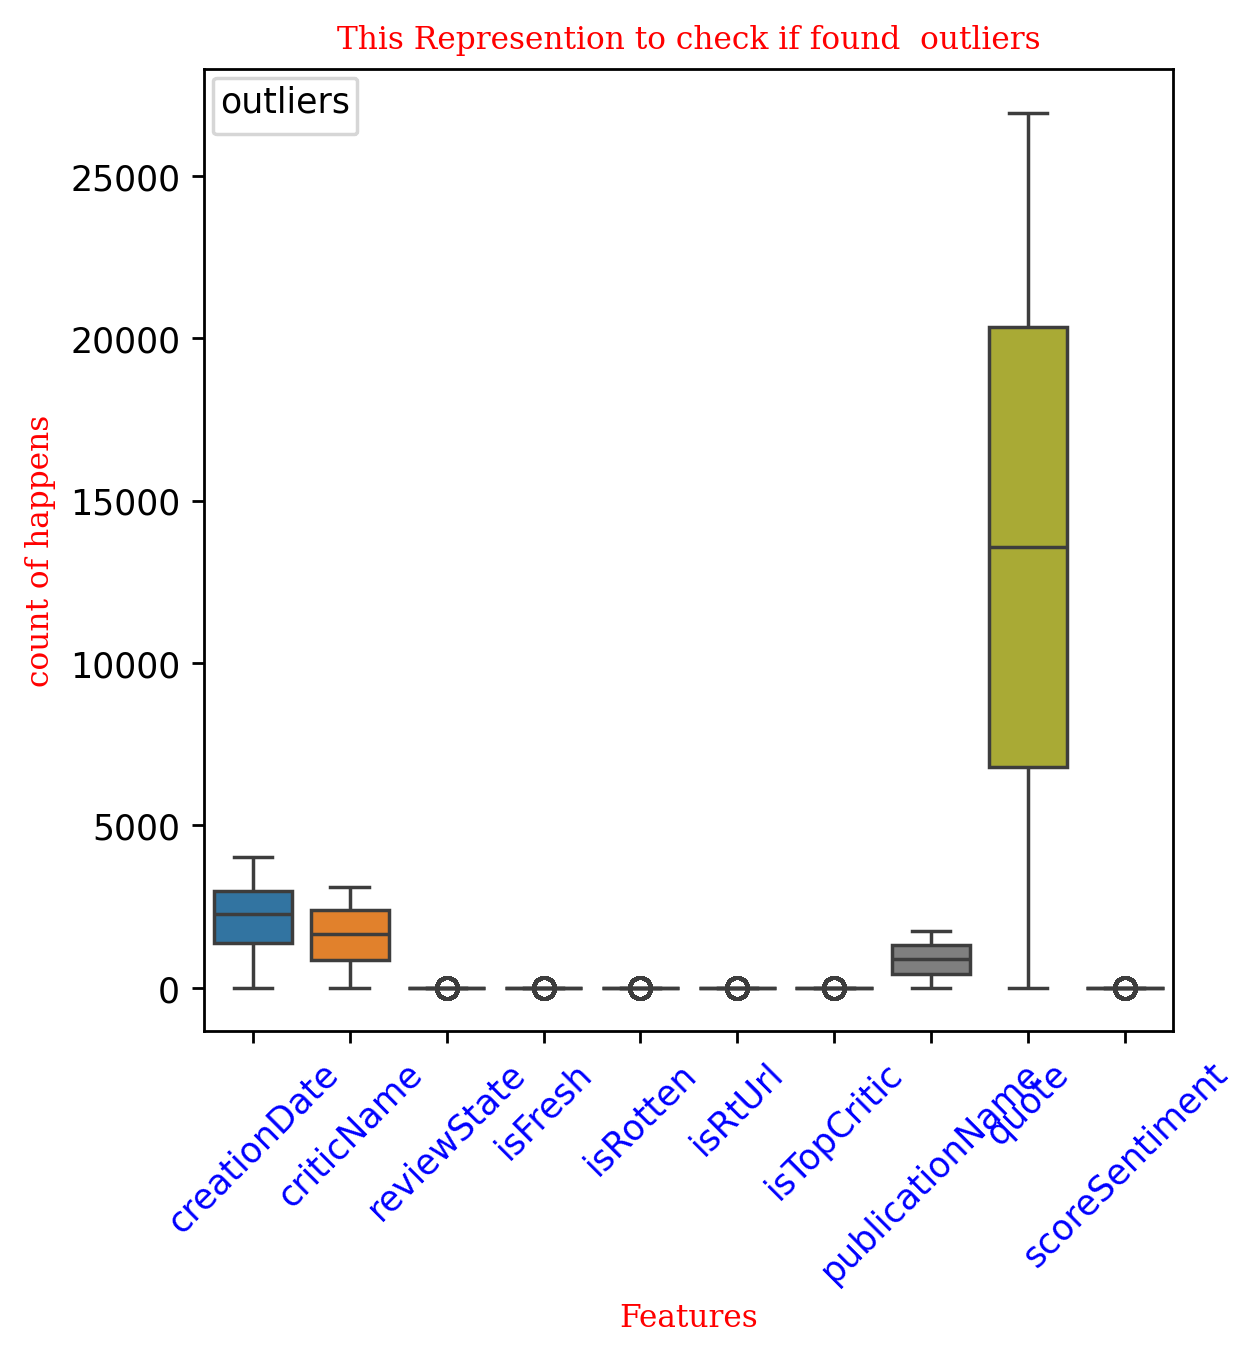

In [18]:
# from this Represention we discover that we found outlier in the  reviewState , isFresh ,isRotten ,isRtUrl ,isTopCritic ,scoreSentiment  :
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(5,5),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data[features])
plt.legend(title="outliers",prop={'size': 5})

upper_limit :  1.9830902331957017
lower_limit :  -0.35756521661623075
Mean Value :  0.8127625082897355
Median Value :  1.0
1st Standard Deviation :  0.3901092416353221


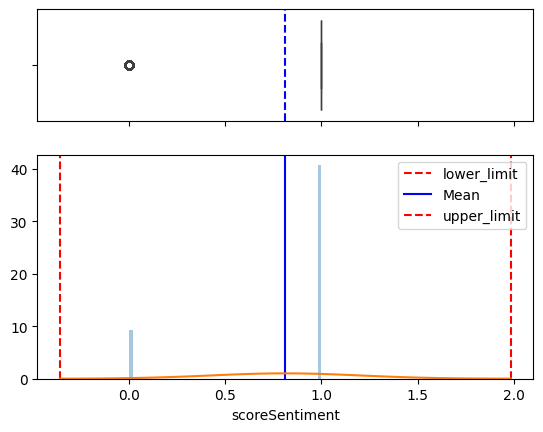

In [19]:
# there outlier in  scoreSentiment feature :
# calculate upper ,lower ,mean ,std , meadian 

from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.scoreSentiment.mean()
std = data.scoreSentiment.std()
median = data.scoreSentiment.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["scoreSentiment"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["scoreSentiment"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

## Data Visualization :

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


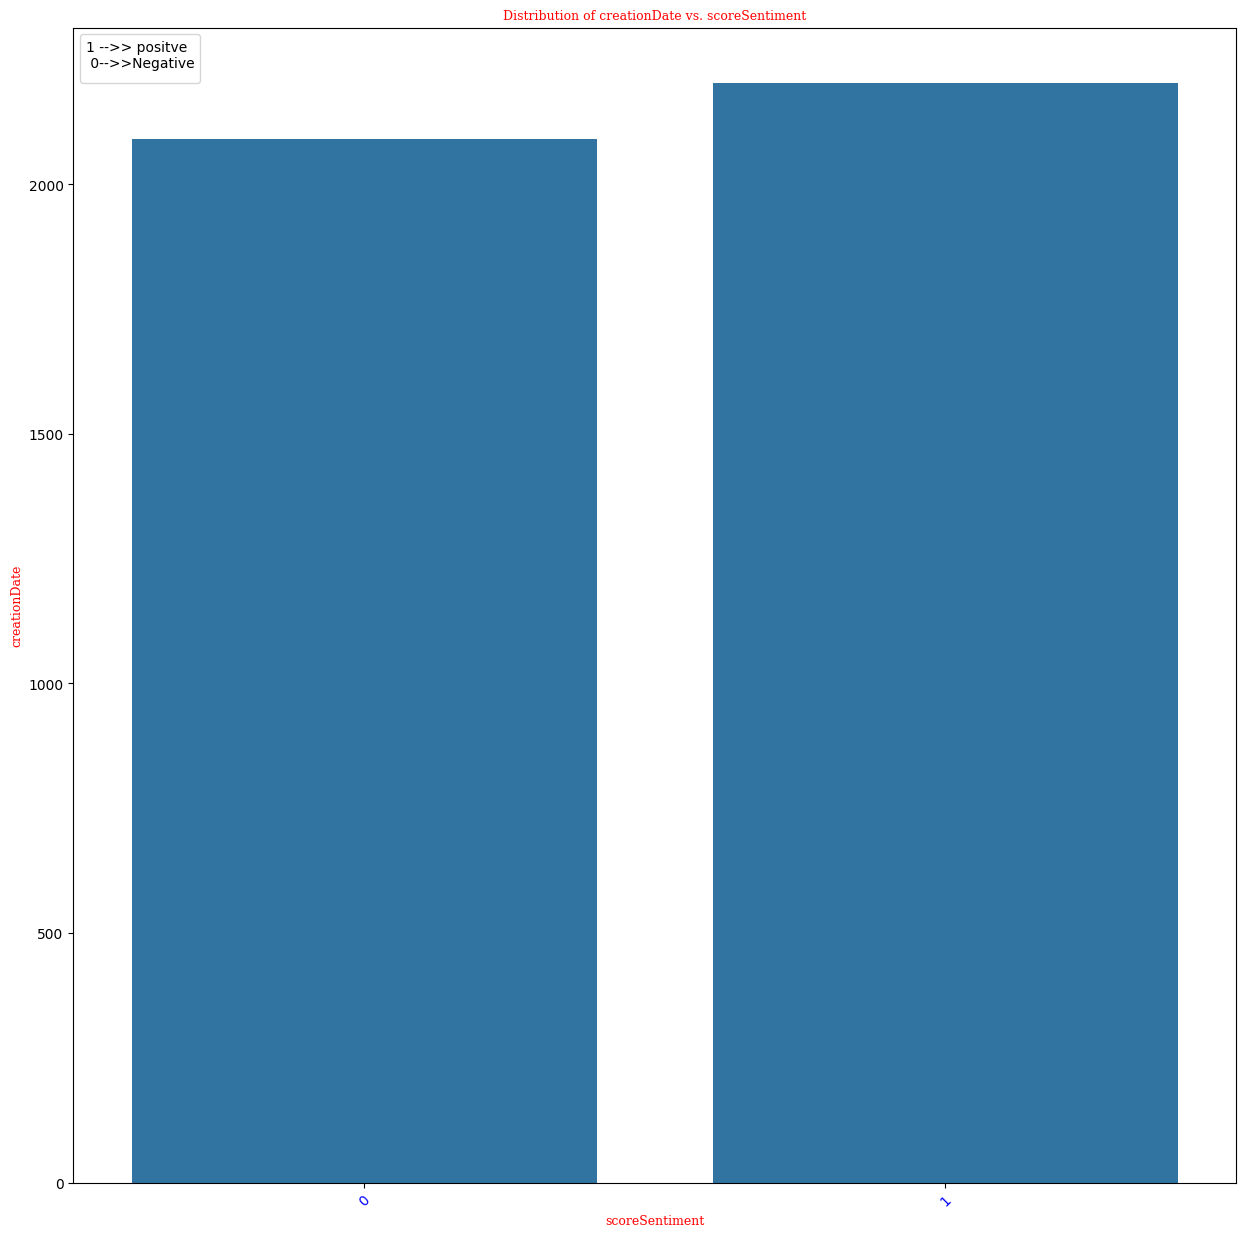

In [20]:
# oserve the creationDate :
plt.figure(figsize=(15,15))
plt.title("Distribution of creationDate vs. scoreSentiment",fontdict=f1)
top_10_popularity=data.groupby("scoreSentiment")["creationDate"].mean().sort_values(ascending=True).iloc[:10]
sns.barplot(x=top_10_popularity.index,y=top_10_popularity.values)
plt.xticks(rotation=45,color="b")
plt.xlabel("scoreSentiment",fontdict=f1)
plt.ylabel("creationDate",fontdict=f1)
plt.legend(title="1 -->> positve \n 0-->>Negative")
plt.show()

array([[<Axes: title={'center': 'creationDate'}>,
        <Axes: title={'center': 'criticName'}>,
        <Axes: title={'center': 'reviewState'}>],
       [<Axes: title={'center': 'isFresh'}>,
        <Axes: title={'center': 'isRotten'}>,
        <Axes: title={'center': 'isRtUrl'}>],
       [<Axes: title={'center': 'isTopCritic'}>,
        <Axes: title={'center': 'publicationName'}>,
        <Axes: title={'center': 'quote'}>],
       [<Axes: title={'center': 'scoreSentiment'}>, <Axes: >, <Axes: >]],
      dtype=object)

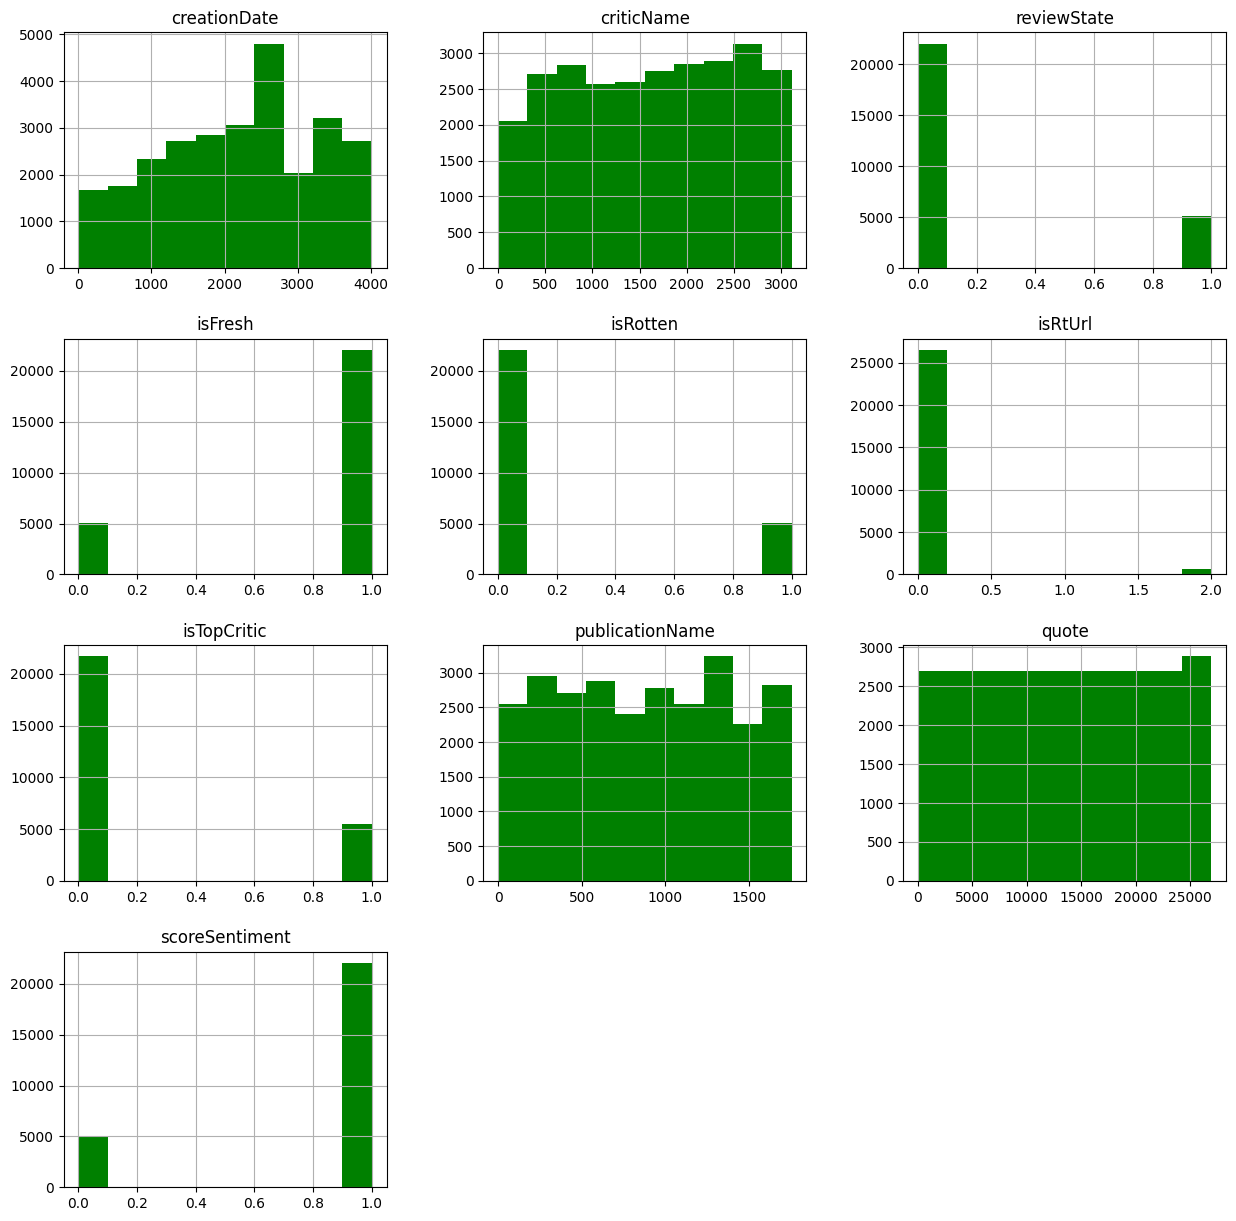

In [21]:
# plot hist to continous data :
data.hist(figsize=(15,15),color="g")

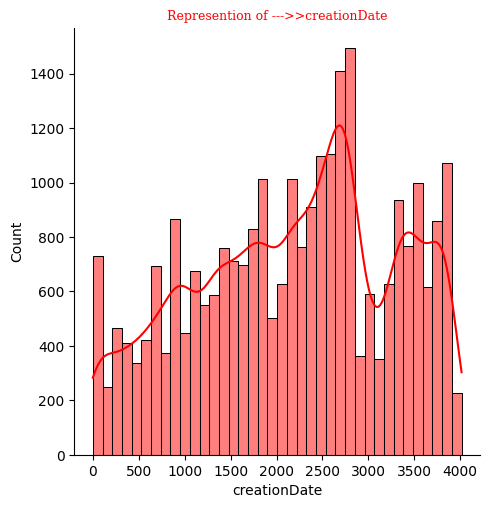

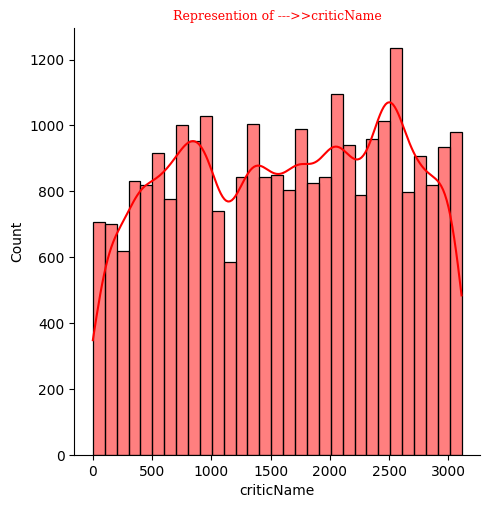

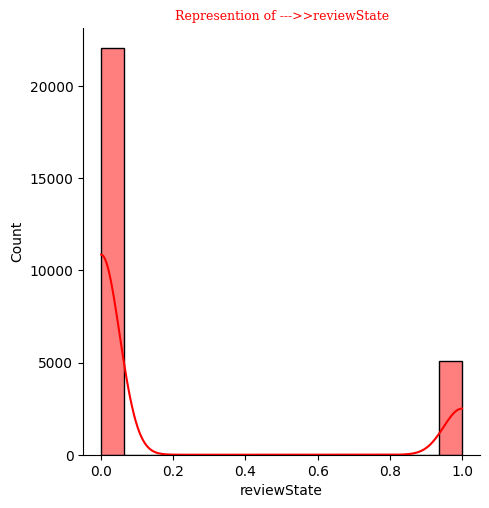

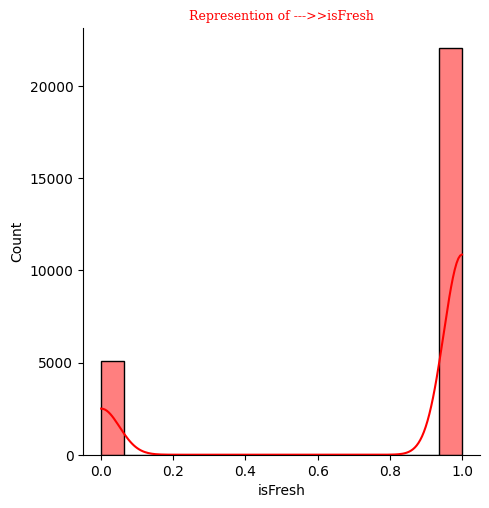

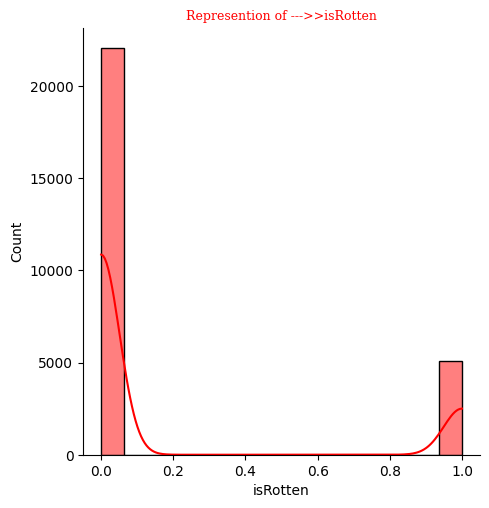

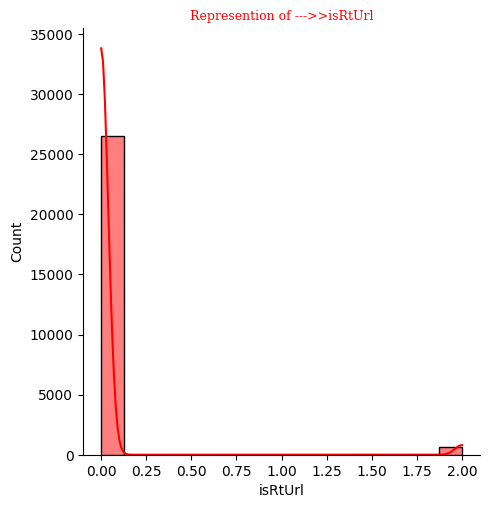

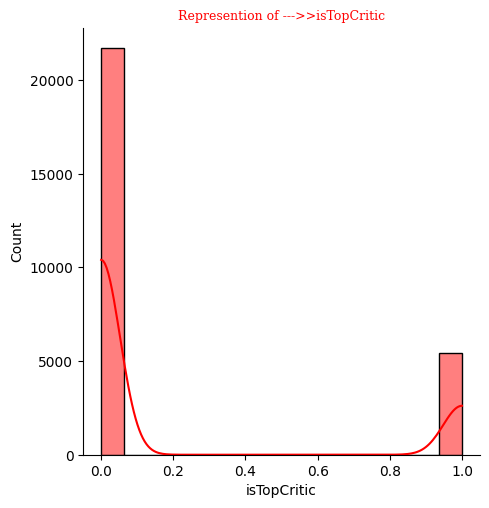

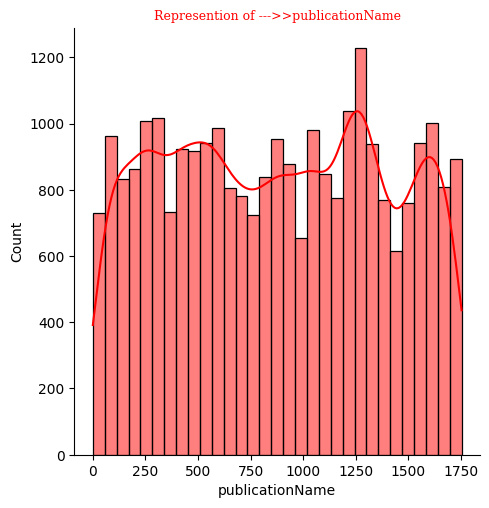

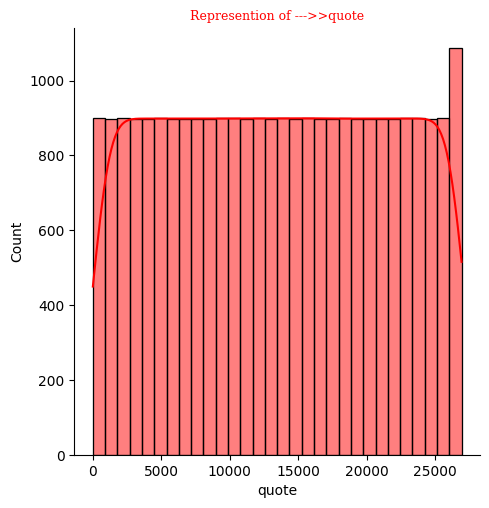

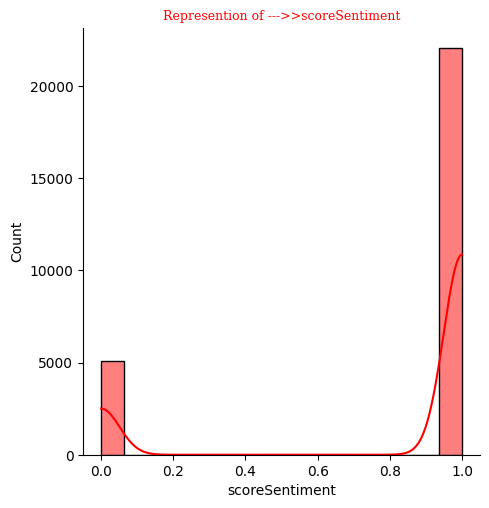

In [22]:
for col in data.select_dtypes("number").columns:
    
    sns.displot(data[col],kde=True,color="r",label=col)
    plt.title("Represention of --->>"+col,fontdict=f1)
        

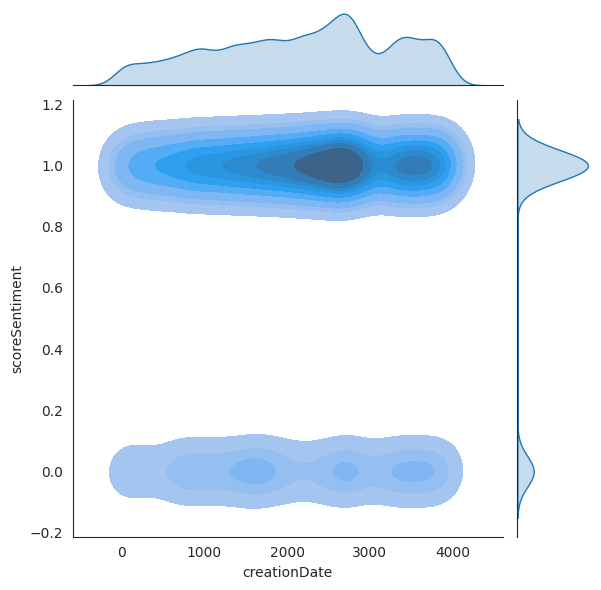

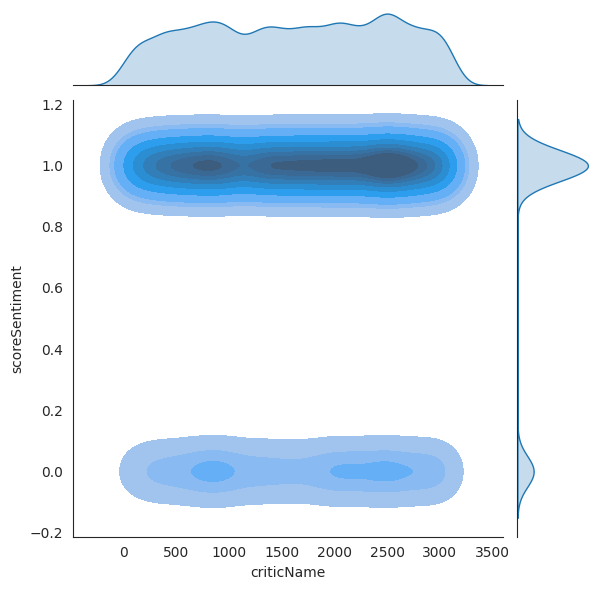

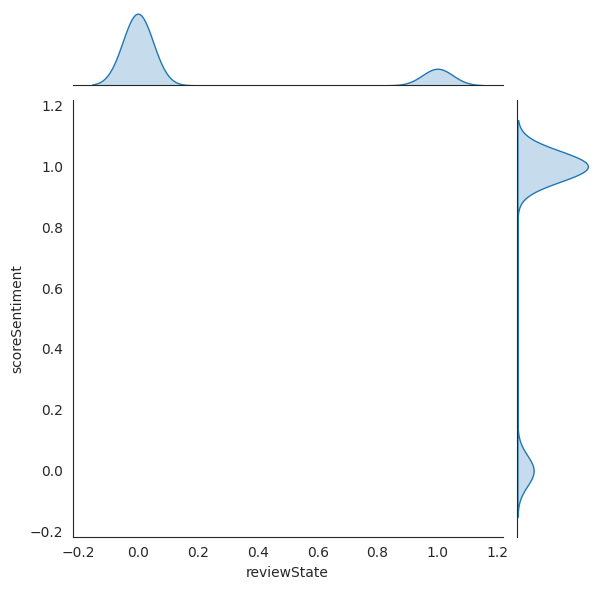

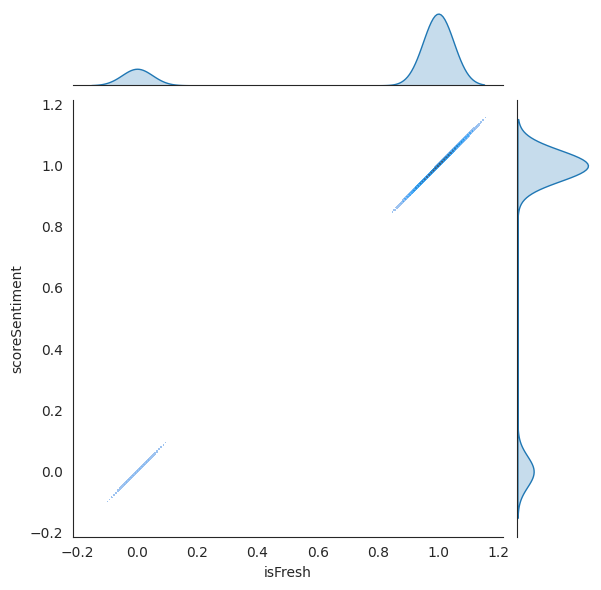

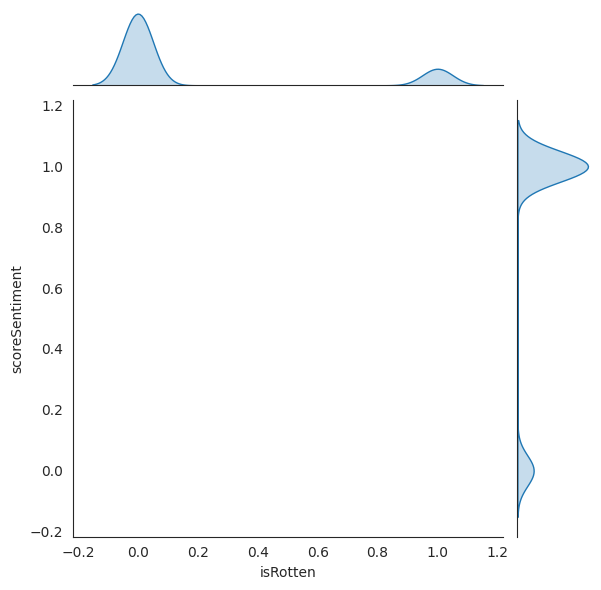

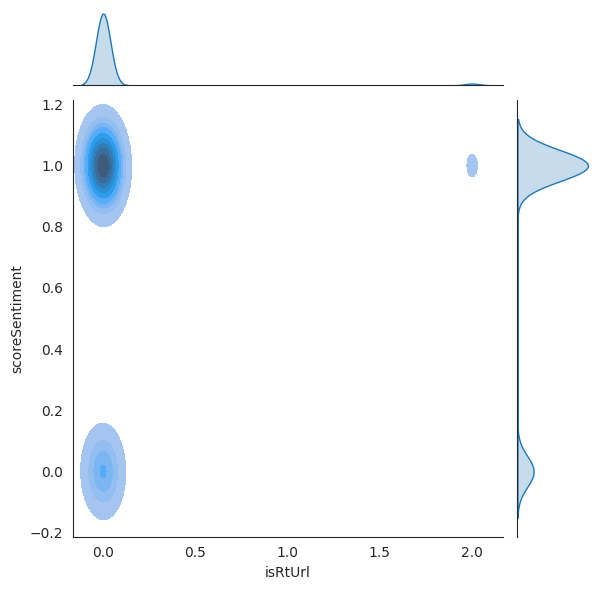

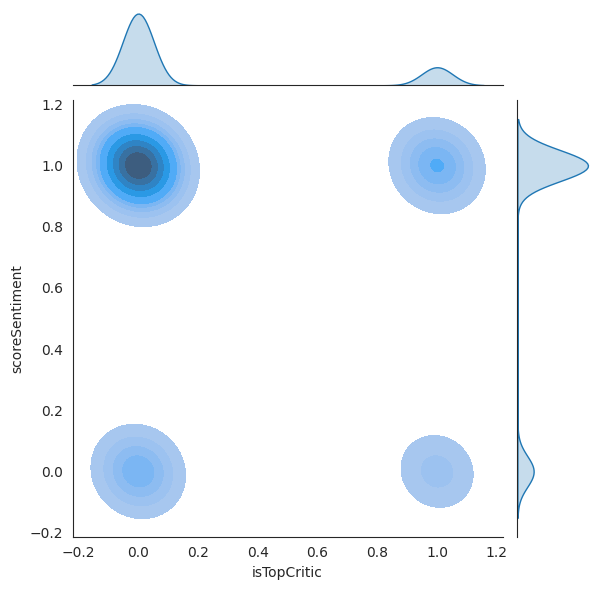

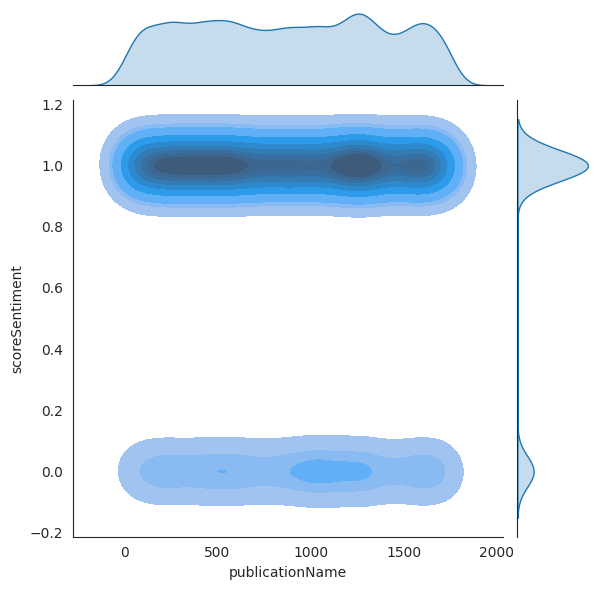

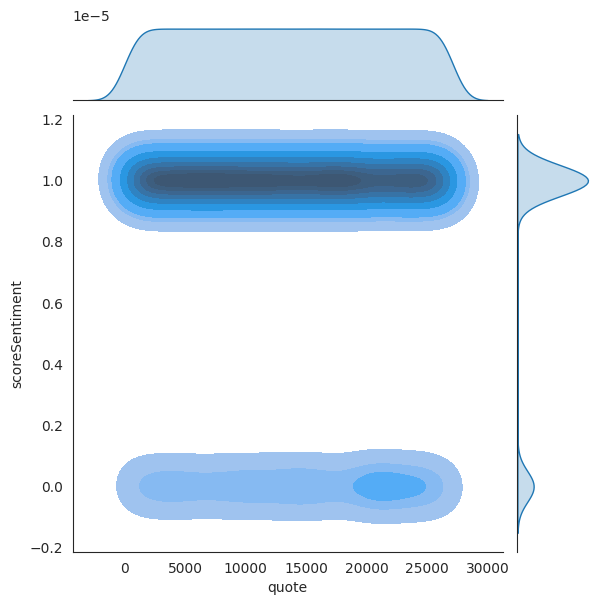

In [23]:
# plot the contor of data : : 
for col in data.select_dtypes("number"):
    if col !="scoreSentiment":
       with sns.axes_style("white"):
          sns.jointplot(x=data[col],y=data["scoreSentiment"],kind="kde",fill=True)

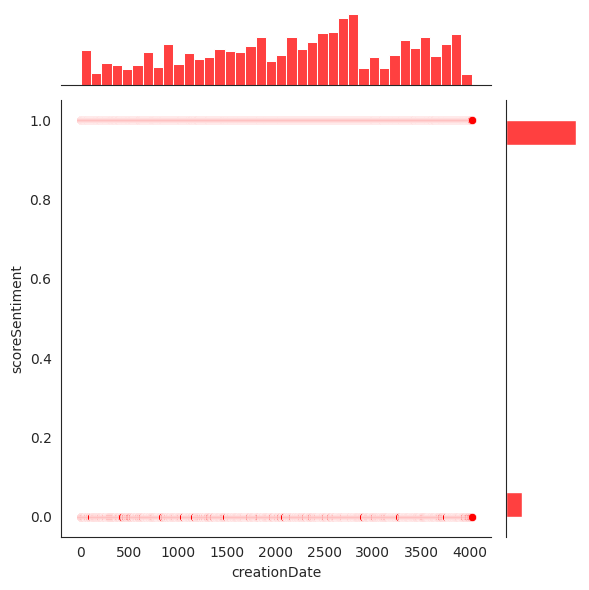

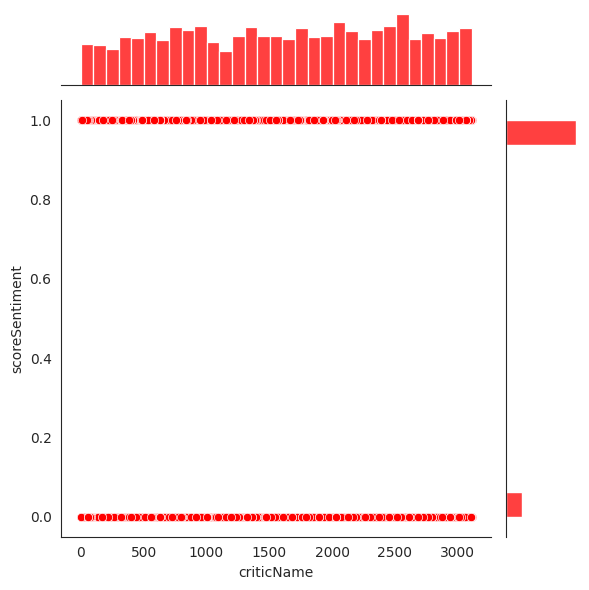

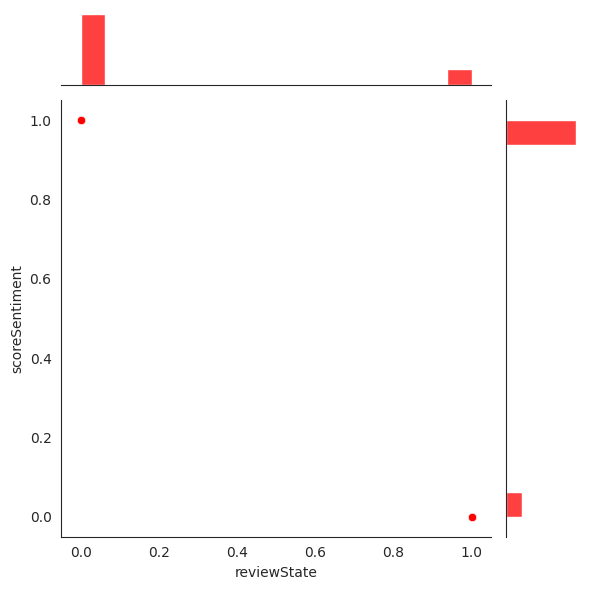

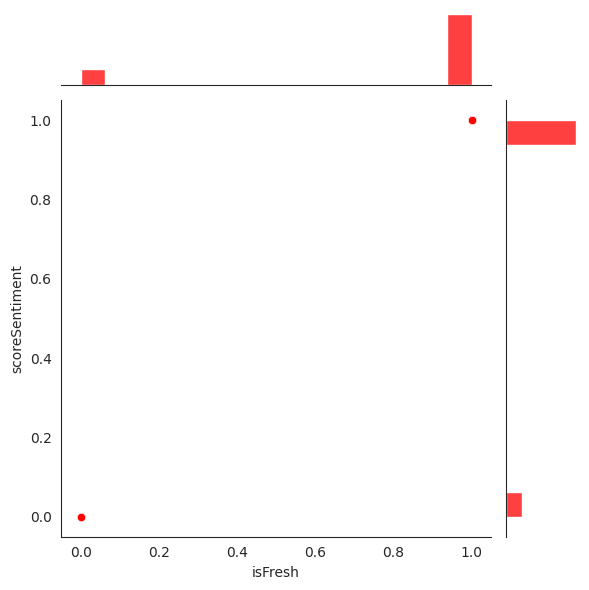

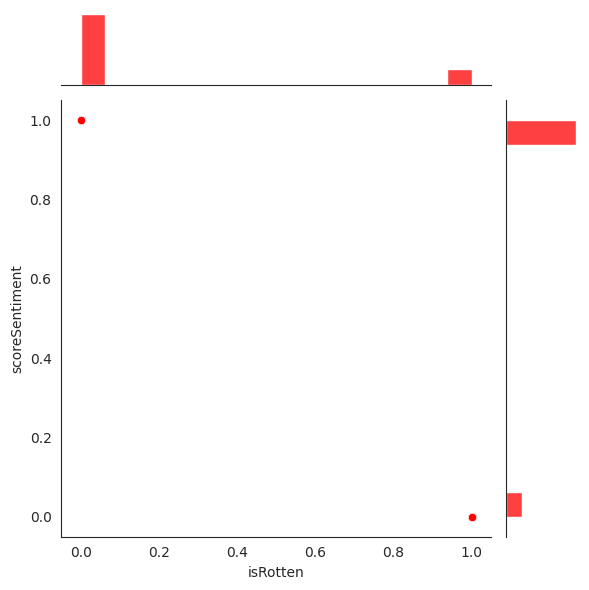

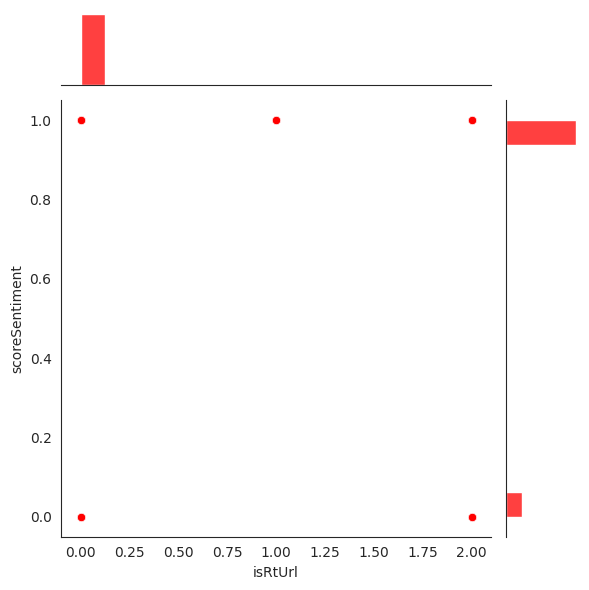

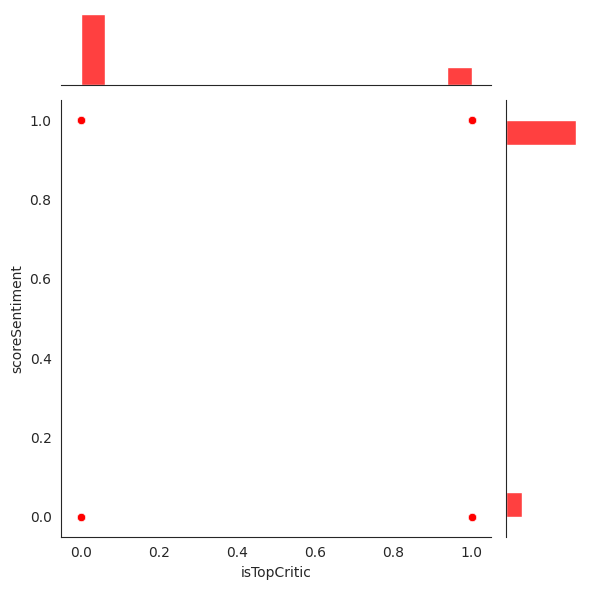

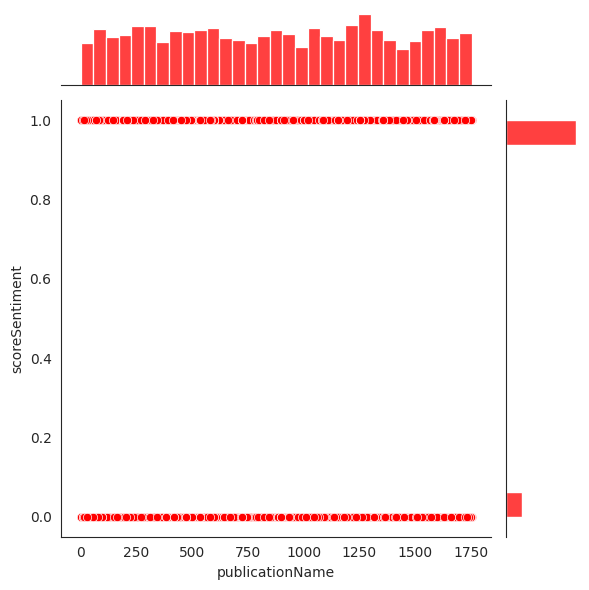

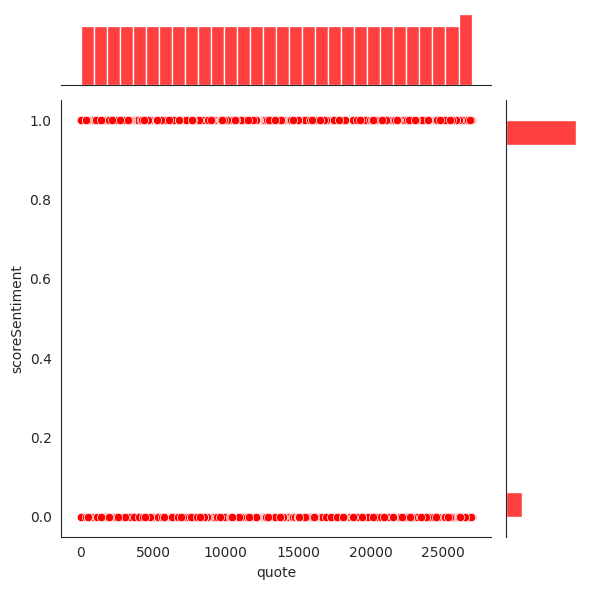

In [24]:
# plot the scatter of data:
for col in data.select_dtypes("number"):
    if col !="scoreSentiment":
       with sns.axes_style("white"):
          sns.jointplot(x=data[col],y=data["scoreSentiment"],kind="scatter",color="r")

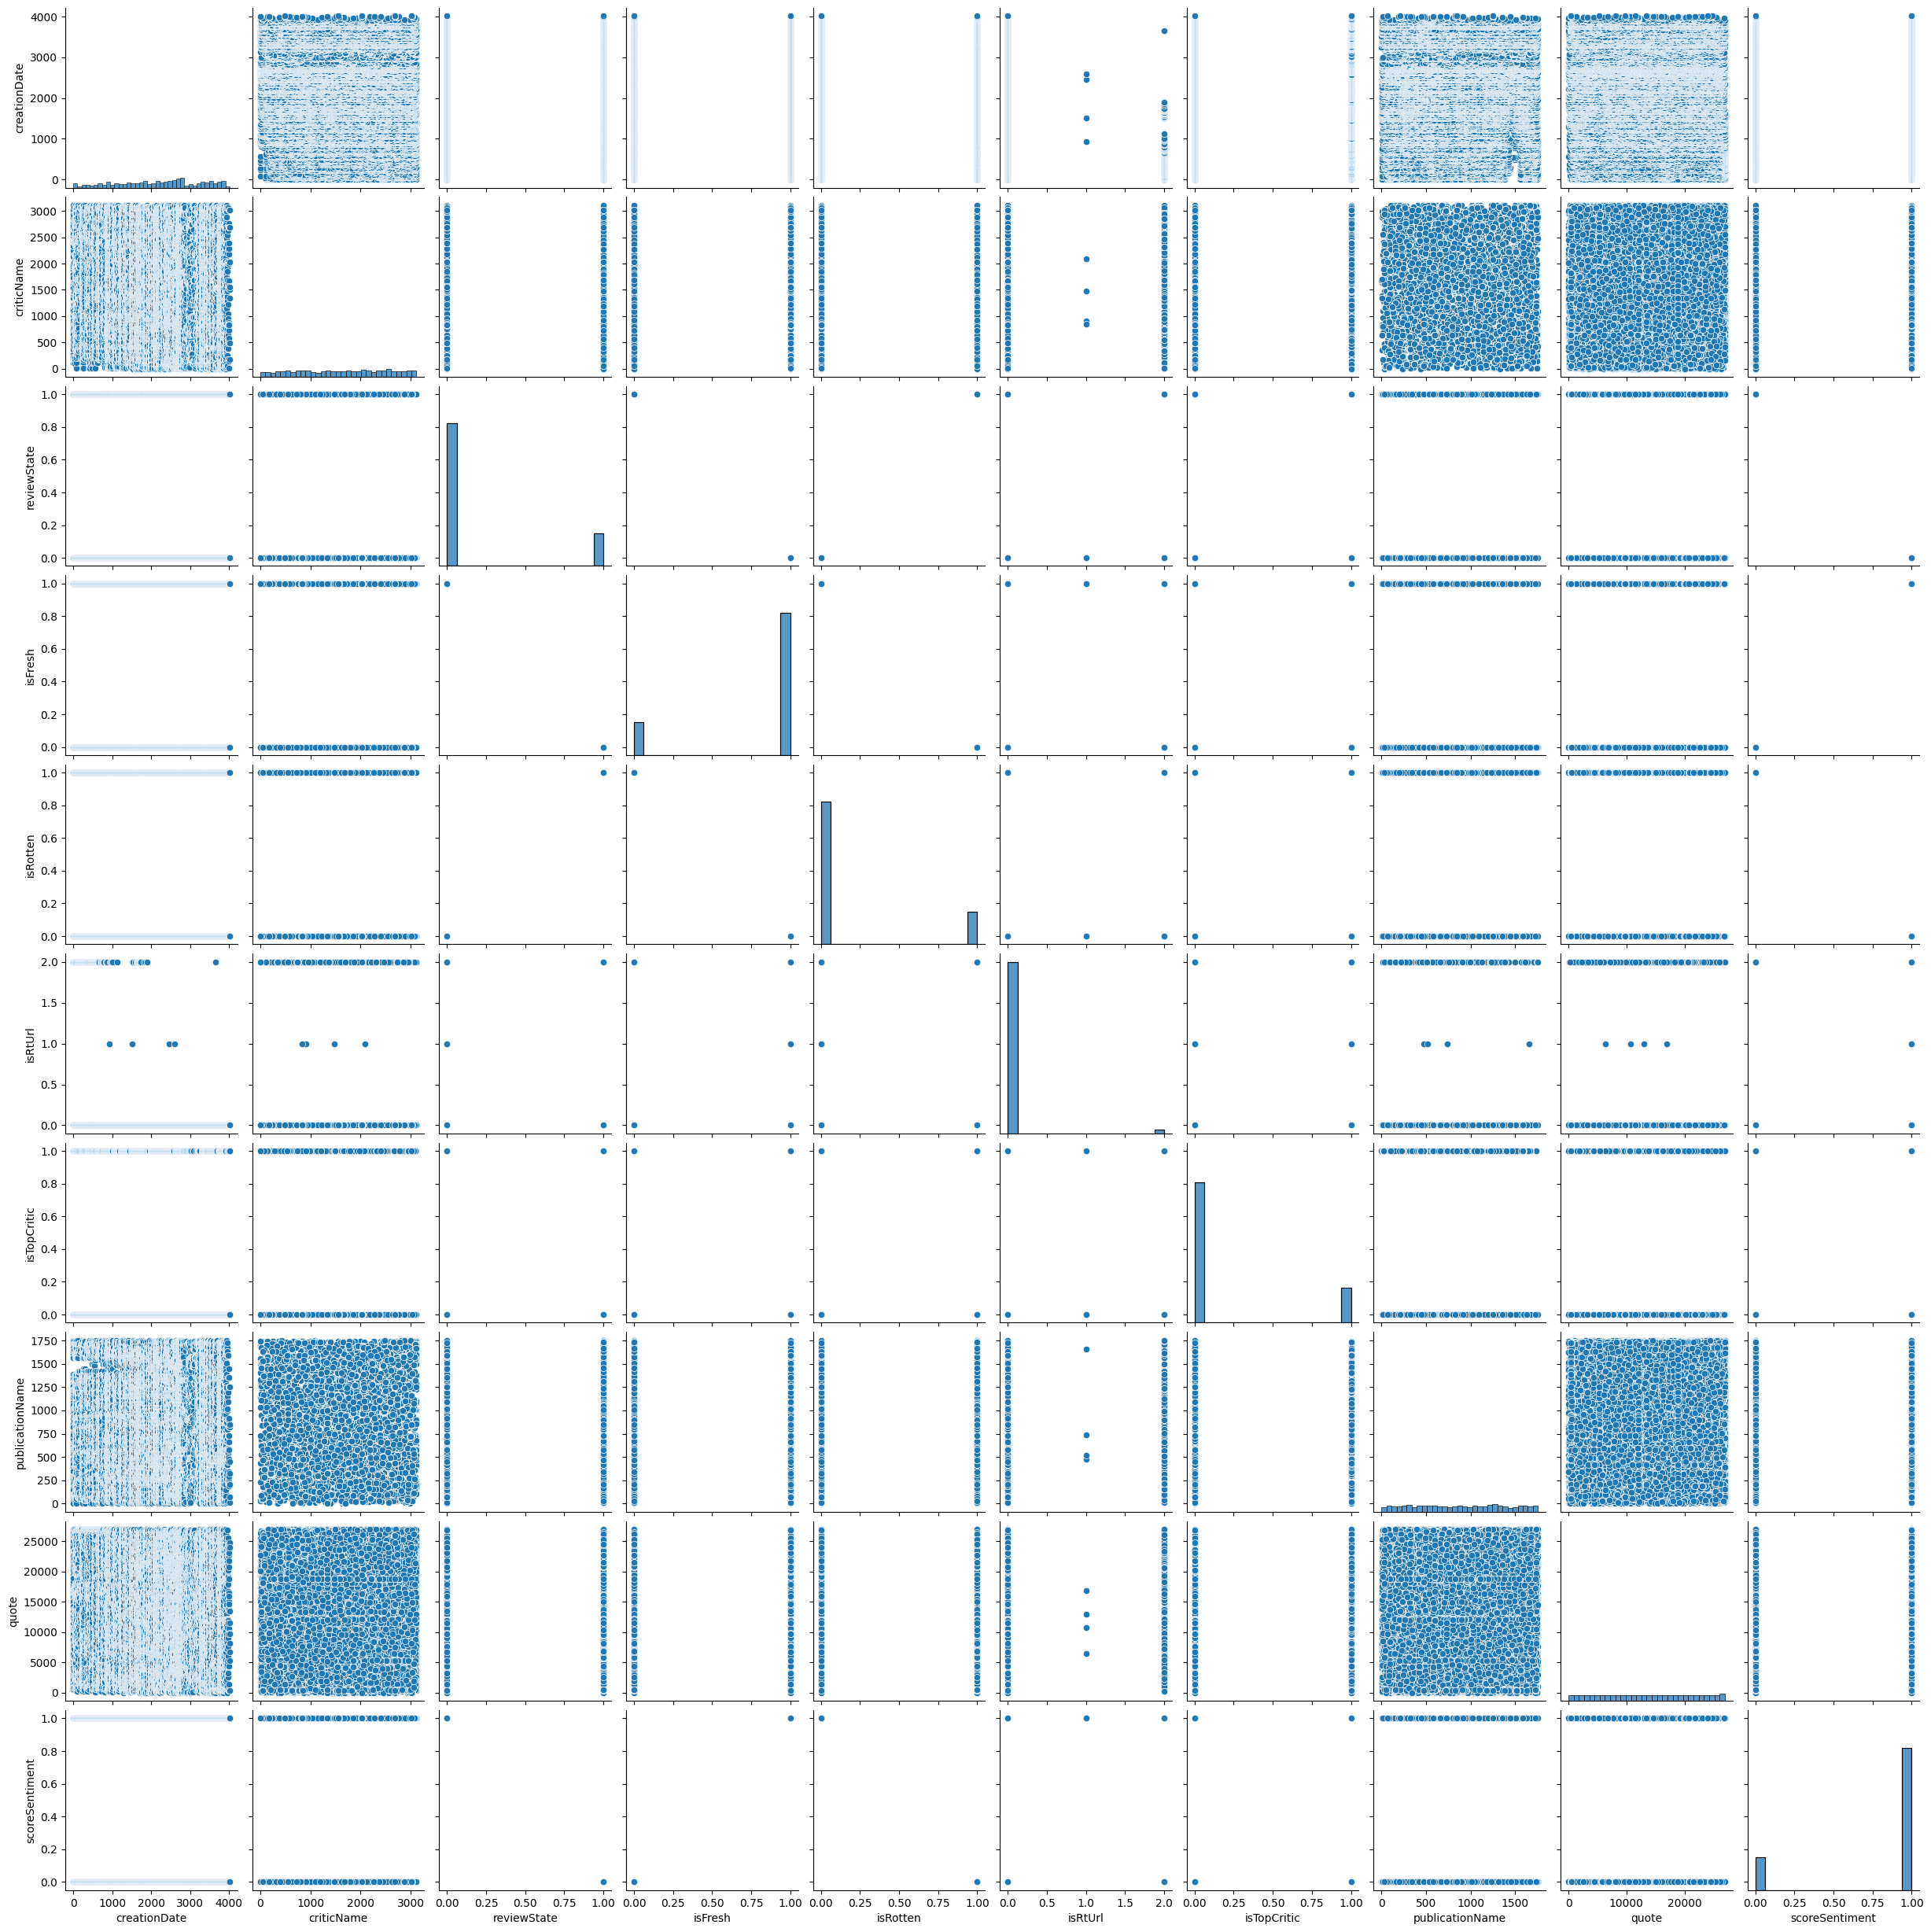

In [25]:
# observe the scatter , line scatter & barchart  of data :
sns.pairplot(data.select_dtypes("number"))

  ## Extract some statistical & the most important properties from the dataset:

In [62]:
# To  detect the high and low-low cardonality features and how to remove it

class Var_Selector(BaseEstimator,TransformerMixin):
    
    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])
        
        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)
        
        # remove high-low cardinality categorical:-
        
        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index
        
        return data.drop(columns=removed_cols)
        

In [63]:
transform=Var_Selector(data)
transform.fit(data)
transform.transform(data)


,creationDate,criticName,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationName,quote,scoreSentiment
0,0,1349,0,1,0,0,0,502,1997,1
1,1,2710,0,1,0,0,0,1577,13149,1
2,2,2578,0,1,0,0,1,224,26141,1
3,2,3111,1,0,1,0,1,475,16370,0
4,2,1411,0,1,0,0,1,1669,4670,1
...,...,...,...,...,...,...,...,...,...,...
27137,4012,2023,0,1,0,0,0,68,9729,1
27138,4013,1556,0,1,0,0,0,824,371,1
27139,4014,490,0,1,0,0,0,206,13407,1
27140,4015,3014,0,1,0,0,1,844,23939,1


In [37]:
# Calculate the correlation :
correlation=data.select_dtypes("number").corr()
print(correlation)
print("-"*50)
spearman=data.select_dtypes("number").corr(method="spearman")
print(spearman)
print("-"*50)
pearson=data.select_dtypes("number").corr(method="pearson")
print(pearson)
print("-"*50)
kendall=data.select_dtypes("number").corr(method="kendall")
print("kendall")

                 creationDate  criticName  reviewState   isFresh  isRotten  \
creationDate         1.000000   -0.034945    -0.040879  0.040879 -0.040879   
criticName          -0.034945    1.000000     0.004405 -0.004405  0.004405   
reviewState         -0.040879    0.004405     1.000000 -1.000000  1.000000   
isFresh              0.040879   -0.004405    -1.000000  1.000000 -1.000000   
isRotten            -0.040879    0.004405     1.000000 -1.000000  1.000000   
isRtUrl             -0.248159    0.006152     0.018098 -0.018098  0.018098   
isTopCritic         -0.107316    0.030298     0.085291 -0.085291  0.085291   
publicationName     -0.003288   -0.004055     0.023994 -0.023994  0.023994   
quote               -0.016988   -0.001047     0.037540 -0.037540  0.037540   
scoreSentiment       0.040879   -0.004405    -1.000000  1.000000 -1.000000   

                  isRtUrl  isTopCritic  publicationName     quote  \
creationDate    -0.248159    -0.107316        -0.003288 -0.016988   
cri

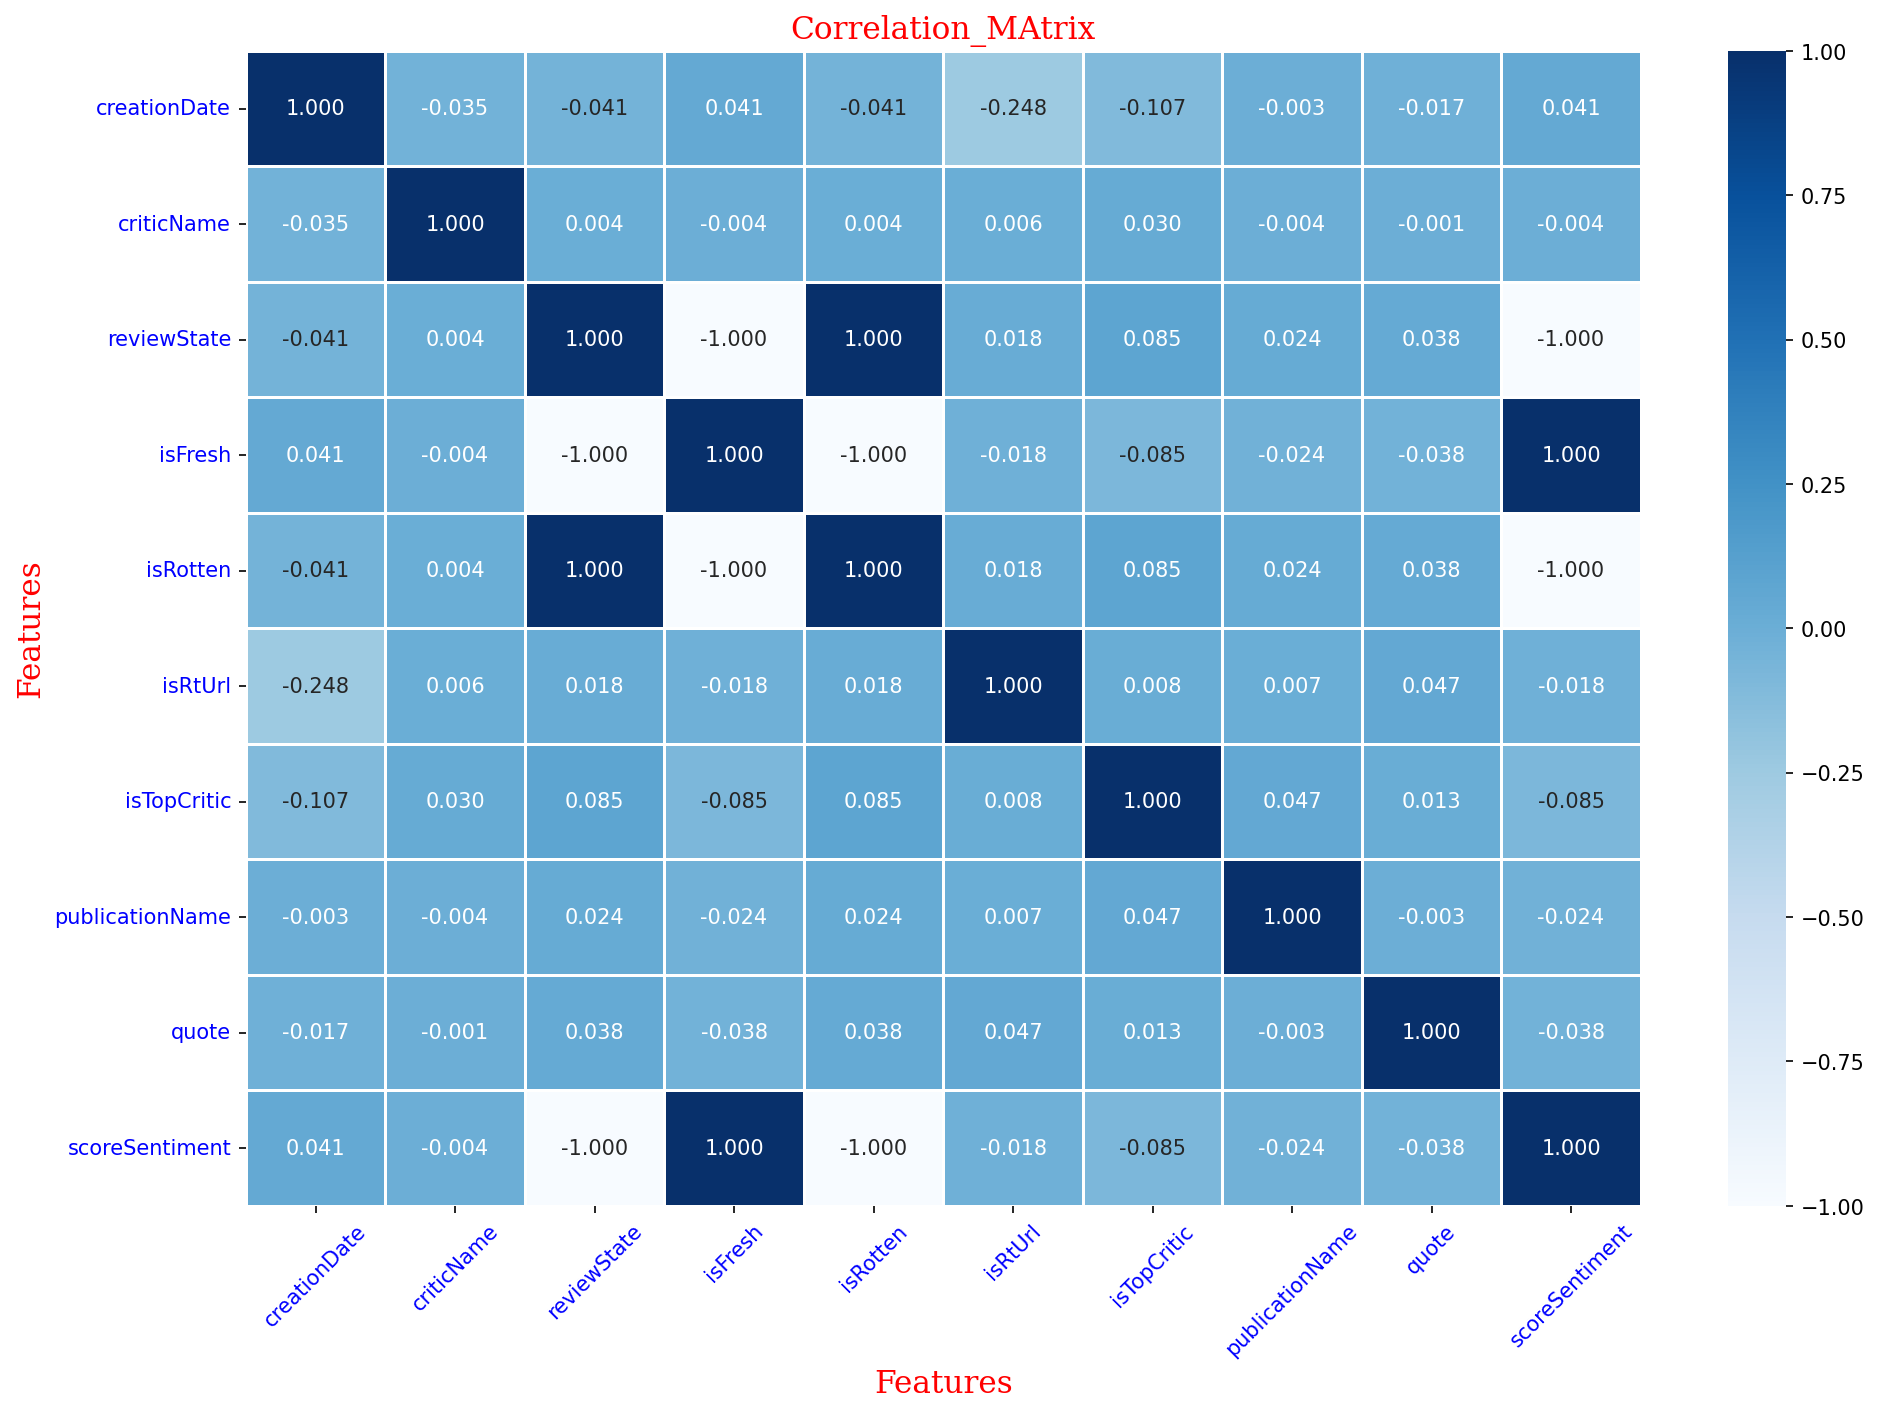

In [48]:
# Make Heatmap Correlation_matrix for all dataset:
f2 = {"family": "serif", "size": 15, "color": "r"}
plt.figure(figsize=(15,10),dpi=150)
plt.title("Correlation_MAtrix",fontdict=f2)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.3f",cmap='Blues',linewidths=0.5)
plt.xlabel("Features",fontdict=f2)
plt.ylabel("Features",fontdict=f2)
plt.xticks(rotation=45,color="b")
plt.yticks(color="b",rotation=0)
plt.show()

In [52]:
# Extract the most important Numerical Features:

from sklearn.feature_selection import SelectKBest
fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="scoreSentiment").select_dtypes("number").fillna(0),data["scoreSentiment"])


SelectKBest(k=5)

In [54]:
featurs_values=pd.DataFrame(fs.pvalues_)
features_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="scoreSentiment").select_dtypes("number").fillna(0).columns)
feature_score=pd.concat([featurs_values,features_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

,pvalues,score,input
0,1.613217e-11,45.430455,creationDate
1,4.680638e-01,0.526558,criticName
2,0.000000e+00,inf,reviewState
3,0.000000e+00,inf,isFresh
4,0.000000e+00,inf,isRotten
5,2.865737e-03,8.892659,isRtUrl
6,5.291930e-45,198.878504,isTopCritic
7,7.704676e-05,15.634203,publicationName
8,6.147058e-10,38.301889,quote


In [56]:
# Extract the most important Categorical Features :
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="scoreSentiment").select_dtypes("number").fillna(0),data["scoreSentiment"])


SelectKBest(k=5, score_func=<function mutual_info_classif at 0x7fe156dbe790>)

In [59]:
features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="scoreSentiment").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

isRtUrl            0.000000
isTopCritic        0.001187
quote              0.032057
creationDate       0.036793
publicationName    0.043850
criticName         0.048756
reviewState        0.482653
isRotten           0.482892
isFresh            0.487056
dtype: float64

## spliting and trained the data :

In [60]:
# After all of this process the data become Cleaning and ready to training :
#split the data:

x=data.drop(columns="scoreSentiment",axis=1)
y=data["scoreSentiment"]
print(np.shape(x),np.shape(y))
print(len(x),len(y))


(27142, 9) (27142,)
27142 27142


In [61]:
#train the dataset:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)
print(np.shape(x_train),np.shape(x_test))
print(np.shape(y_train),np.shape(x_test))

(18999, 9) (8143, 9)
(18999,) (8143, 9)


## Bulding Sequetial Neural Network model BY using Tensorflow :

In [68]:
# imports :
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2

2024-07-09 02:08:30.202410: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-09 02:08:30.236205: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 02:08:30.459024: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 02:08:30.460241: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 02:08:31.225455: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [95]:
#Build the model:

model=Sequential([
    
    Input(shape=[9]),
    
    Dense(units=128,activation="relu"),
    Dropout(0.1),
    
    Dense(units=256,activation="relu"),
    Dropout(0.2),

    Dense(units=512,activation="relu"),
    Dropout(0.3),

    Dense(units=256,activation="relu"),
    Dropout(0.2),
    
    Dense(units=1,activation="sigmoid"),
        
               ])
model

In [96]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=BinaryCrossentropy(from_logits=True),  # Use from_logits=True for logits output
    metrics=['accuracy']
)

In [97]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1280      
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 512)               131584    
                                                                 
 dropout_18 (Dropout)        (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 256)              

In [99]:
# Fit the model
AN=model.fit(x_train, y_train, epochs=50, batch_size=35, validation_split=0.1)
AN

Epoch 1/50
489/489 [==============================] - 1s 2ms/step - loss: 0.4821 - accuracy: 0.8135 - val_loss: 0.4933 - val_accuracy: 0.8053
Epoch 2/50
489/489 [==============================] - 1s 2ms/step - loss: 0.4810 - accuracy: 0.8136 - val_loss: 0.4933 - val_accuracy: 0.8053
Epoch 3/50
489/489 [==============================] - 1s 2ms/step - loss: 0.4810 - accuracy: 0.8136 - val_loss: 0.4932 - val_accuracy: 0.8053
Epoch 4/50
489/489 [==============================] - 1s 2ms/step - loss: 0.4810 - accuracy: 0.8136 - val_loss: 0.4933 - val_accuracy: 0.8053
Epoch 5/50
489/489 [==============================] - 1s 2ms/step - loss: 0.4810 - accuracy: 0.8136 - val_loss: 0.4933 - val_accuracy: 0.8053
Epoch 6/50
489/489 [==============================] - 1s 2ms/step - loss: 0.4834 - accuracy: 0.8136 - val_loss: 0.4932 - val_accuracy: 0.8053
Epoch 7/50
489/489 [==============================] - 1s 2ms/step - loss: 0.4831 - accuracy: 0.8135 - val_loss: 0.4933 - val_accuracy: 0.8053
Epoch 

In [100]:
# predict on the model:
y_prediction=model.predict(x_test)
y_prediction[:10]

255/255 [==============================] - 0s 581us/step


array([[0.81449455],
       [0.81449455],
       [0.81449455],
       [0.81449455],
       [0.81449455],
       [0.81449455],
       [0.81449455],
       [0.81449455],
       [0.81449455],
       [0.81449455]], dtype=float32)

In [101]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_prediction)} \n the max_value for prediction --->>> {np.max(y_prediction)}")

the min_value for prediction --->> 0.8144945502281189 
 the max_value for prediction --->>> 0.8144945502281189


In [102]:
#Evalute the score:

model.evaluate(x_test,y_test,verbose=2)

255/255 - 0s - loss: 0.4823 - accuracy: 0.8127 - 156ms/epoch - 610us/step


[0.48226064443588257, 0.8127225637435913]

In [73]:
# Build Regulized model: (Sequentail Api Regulized) -->> to improve from the accuracy 

model_r=Sequential([
    
    Input(shape=[9]),
    
    Dense(units=128,activation="relu",kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    
    Dense(units=256,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.2),

    Dense(units=512,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.3),

    Dense(units=256,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.2),
    
    Dense(units=1,activation="sigmoid",kernel_regularizer=l2(.01)),
        
    
                  ])
model_r


In [80]:
model_r.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1280      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)              

In [74]:
#compile:
model_r.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
  )

In [75]:
history=model_r.fit(x_train,y_train,epochs=20,batch_size=35,validation_split=0.1,)
history

Epoch 1/20
489/489 [==============================] - 2s 2ms/step - loss: 21.3118 - accuracy: 0.7323 - val_loss: 6.7360 - val_accuracy: 0.8053
Epoch 2/20
489/489 [==============================] - 1s 2ms/step - loss: 6.3389 - accuracy: 0.8078 - val_loss: 5.9100 - val_accuracy: 0.8053
Epoch 3/20
489/489 [==============================] - 1s 2ms/step - loss: 5.4768 - accuracy: 0.8115 - val_loss: 5.1086 - val_accuracy: 0.8053
Epoch 4/20
489/489 [==============================] - 1s 2ms/step - loss: 4.7540 - accuracy: 0.8124 - val_loss: 4.4131 - val_accuracy: 0.8053
Epoch 5/20
489/489 [==============================] - 1s 2ms/step - loss: 4.1208 - accuracy: 0.8121 - val_loss: 3.8319 - val_accuracy: 0.8053
Epoch 6/20
489/489 [==============================] - 1s 2ms/step - loss: 3.5634 - accuracy: 0.8127 - val_loss: 3.3088 - val_accuracy: 0.8053
Epoch 7/20
489/489 [==============================] - 1s 2ms/step - loss: 3.0668 - accuracy: 0.8127 - val_loss: 2.8399 - val_accuracy: 0.8053
Epoch

In [76]:
# predict on the model:
y_p=model_r.predict(x_test)
y_p[:10]

255/255 [==============================] - 0s 581us/step


array([[0.8142419 ],
       [0.81434786],
       [0.8142505 ],
       [0.8153886 ],
       [0.8142395 ],
       [0.8151953 ],
       [0.8142659 ],
       [0.8142873 ],
       [0.8142592 ],
       [0.814366  ]], dtype=float32)

In [77]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_p)} \n the max_value for prediction --->>> {np.max(y_p)} ")

the min_value for prediction --->> 0.8142333030700684 
 the max_value for prediction --->>> 0.8174327611923218 


In [78]:
#Evalute the score:

model_r.evaluate(x_test,y_test,verbose=2)

255/255 - 0s - loss: 0.5026 - accuracy: 0.8127 - 202ms/epoch - 792us/step


[0.5025526285171509, 0.8127225637435913]

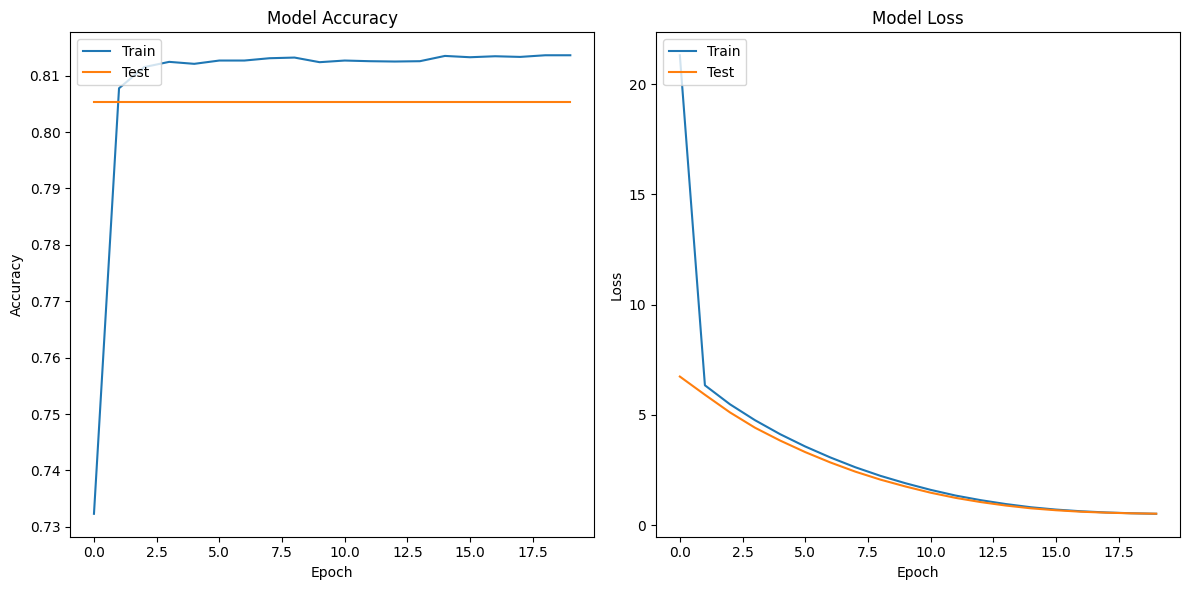

In [79]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

tf.Tensor(
[[1525    0]
 [6618    0]], shape=(2, 2), dtype=int32)


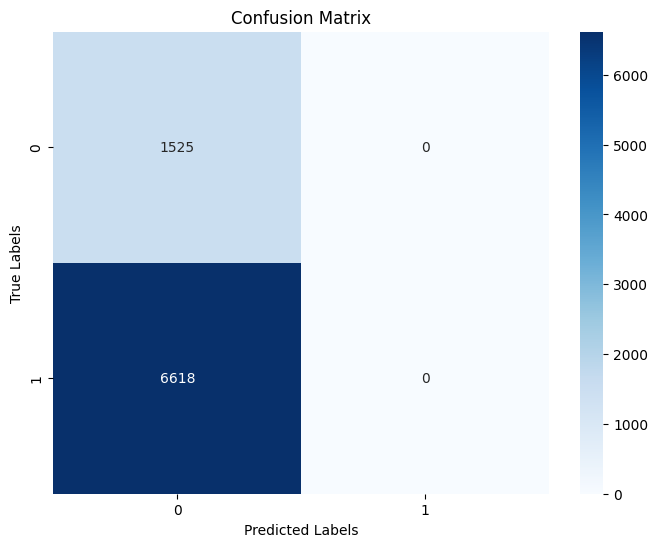

In [87]:
# Calculate the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_p)
print(confusion_matrix)

# Convert the confusion matrix to a numpy array
confusion_matrix = confusion_matrix.numpy()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
 


## About Results :

* About Neural Network models that build by using Tensorflow we found that  :  accuracy --->>  81.27 % and the same after improvement . 


* accuracy of loss: 0.5026 %

* if you find my project is useful did not forget to upvote me . 


In [106]:
print("""
   Devloper : AbdalRahman Gameel Ahmed Hebishy

   Here the project is ended . 
""")


   Devloper : AbdalRahman Gameel Ahmed Hebishy

   Here the project is ended . 

